# Churn Analytics

In [1]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py #visualization
import plotly.graph_objs as go #visualization
import warnings
warnings.filterwarnings("ignore")

## Data Import

In [2]:
# import the telcom data
ecom = pd.read_csv(r'D:\DAB\3nd - DAB\DAB303-25F-002 MARKETING ANALYTICS - PRATIK BEDI\Labs - W1\Week3_Lab\Project 1 Churn Analytics\E-Commerce Churn Data.csv')

## Data Overview
- Check out the data

- What you are looking for?
    - look for missing values
    - look for abnormalities
    - Do you need to parse the data?
    - Do you need to change the column name?
    - Do you need to standardize data?
    - Is there any data conflicts you need to change or remove?

In [3]:
# data overview
ecom.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4.0,NaN,NaN,0.0,0.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,NaN
NumberOfDeviceRegistered,3,4,4,4,3


In [4]:
# data information
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# check for the missing values
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
# after looking at the data, we have found that there are spaces instad of missing value
# replacing " " or any missing values with np.NaN
ecom = ecom.replace(" ", np.nan)

In [7]:
# check for the missing values
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
#  Data Inspection
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [9]:
sniff_modified(ecom)

,data type,percent missing,No. unique,unique values
CustomerID,int64,0.000000,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.000000,2,"[1, 0]"
NumberOfAddress,int64,0.000000,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.000000,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.000000,6,"[3, 4, 5, 2, 1, 6]"
Churn,int64,0.000000,2,"[1, 0]"
CityTier,int64,0.000000,3,"[3, 1, 2]"
CashbackAmount,int64,0.000000,220,"[160, 121, 120, 134, 130, 139, 123, 127, 295, ..."
WarehouseToHome,float64,4.458259,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
HourSpendOnApp,float64,4.529307,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"


In [10]:
# Checking for Duplicates
duplicates = ecom[ecom.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


### Checking for Duplicates

- After checking duplicates, I verified that no rows were duplicated 

## Data Cleaning

- Clean data based on data overview

`After the data overview, we can conclude that a part of the missing values in 7 columns need to be cleaned for further analysis.`


## Data Cleaning & Preprocessing Steps

This section describes how missing values and data inconsistencies were handled before running churn analysis.

## 1. Missing Data Overview
I identified missing values in the following columns (out of 5630 rows):

| **Column** | **Missing Count** | **% Missing** |
|-----------|-----------------|-------------|
| Tenure | 264 | 4.7% |
| WarehouseToHome | 251 | 4.5% |
| HourSpendOnApp | 255 | 4.5% |
| OrderAmountHikeFromlastYear | 265 | 4.7% |
| CouponUsed | 256 | 4.5% |
| OrderCount | 258 | 4.6% |
| DaySinceLastOrder | 307 | 5.4% |

Columns such as `CustomerID`, `Churn`, `Gender`, and `CashbackAmount` had no missing values.

---

## 2. Cleaning Strategy
Instead of dropping rows (which would remove ≈5% of data), I performed **imputation** (filling missing values) to preserve as many customers as possible for churn prediction.

| **Column** | **Imputation Method** | **Reason** |
|-----------|---------------------|-----------|
| **Tenure** | Median value | Robust to outliers and keeps distribution realistic. |
| **WarehouseToHome** | Median value | Median is better for skewed distance data. |
| **HourSpendOnApp** | Median value | Prevents bias from outliers (very high users). |
| **OrderAmountHikeFromlastYear** | `0` (no hike) | Missing likely means no order growth. |
| **CouponUsed** | `0` | Missing implies no coupon used. |
| **OrderCount** | Median value | Keeps order activity close to typical user behavior. |
| **DaySinceLastOrder** | `max + 1` (treated as very inactive) | Represents longest inactivity realistically. |

---


## 3. Encoding & Feature Preparation
- **Categorical variables** (`PreferredLoginDevice`, `CityTier`, `PreferredPaymentMode`, etc.) were **One-Hot Encoded** for machine learning.
- **Binary variables** (`Churn`, `Complain`) kept as `0`/`1`.
- **Numeric features** were **standardized** using `StandardScaler` to improve model performance.

---

## 4. Verification
After imputation:
- **No missing values remained** (`df.isnull().sum()` returned all zeros).
- Dataset preserved all 5630 customers for analysis.

In [11]:
import pandas as pd
import numpy as np

# Fill missing values

ecom['Tenure'].fillna(ecom['Tenure'].median(), inplace=True)
ecom['WarehouseToHome'].fillna(ecom['WarehouseToHome'].median(), inplace=True)
ecom['HourSpendOnApp'].fillna(ecom['HourSpendOnApp'].median(), inplace=True)
ecom['OrderAmountHikeFromlastYear'].fillna(ecom['OrderAmountHikeFromlastYear'].median(), inplace=True)
ecom['CouponUsed'].fillna(0, inplace=True)  # assuming NaN = no coupon used
ecom['OrderCount'].fillna(ecom['OrderCount'].median(), inplace=True)
ecom['DaySinceLastOrder'].fillna(ecom['DaySinceLastOrder'].median(), inplace=True)

# Verify that there are no missing values left
print(ecom.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [12]:
for col in ecom.columns:
    print(f"Column: {col}")
    print(ecom[col].unique())
    print('-'*40)

Column: CustomerID
[50001 50002 50003 ... 55628 55629 55630]
----------------------------------------
Column: Churn
[1 0]
----------------------------------------
Column: Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
----------------------------------------
Column: PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']
----------------------------------------
Column: CityTier
[3 1 2]
----------------------------------------
Column: WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
----------------------------------------
Column: PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
----------------------------------------
Column: Gender
['Female' 'Male']
----------------------------------------
Col

In [13]:
#replace values in Senior Citizen column
ecom["Churn"] = ecom["Churn"].replace({1:"Yes",0:"No"})

In [14]:
# saparting tenure into categories in order to group the customers
# Convert Tenure to categorical column
def tenure_lab(ecom) :
    
    if ecom["Tenure"] <= 12 :
        return "Tenure_0-12"
    elif (ecom["Tenure"] > 12) & (ecom["Tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (ecom["Tenure"] > 24) & (ecom["Tenure"] <= 48) :
        return "Tenure_24-48"
    elif (ecom["Tenure"] > 48) & (ecom["Tenure"] <= 60) :
        return "Tenure_48-60"
    elif ecom["Tenure"] > 60 :
        return "Tenure_gt_60"

ecom["tenure_group"] = ecom.apply(lambda ecom:tenure_lab(ecom),
                                      axis = 1)

In [15]:
#check the final data
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,50001,Yes,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,Tenure_0-12
1,50002,Yes,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,Tenure_0-12
2,50003,Yes,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,Tenure_0-12
3,50004,Yes,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,Tenure_0-12
4,50005,Yes,0.0,Phone,1,12.0,CC,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,Tenure_0-12


# Exploratory Analysis

- Create plots which make sense and helps to answer business question.

- hint:
     - Always make sure that you are inclunding few plots with variable of intrest.

### Plot 1 Customer Churn Distribution

In [16]:
#labels
lab = ecom["Churn"].value_counts().keys().tolist()
#values
val = ecom["Churn"].value_counts().values.tolist()

print(lab)
print(val)

['No', 'Yes']
[4682, 948]


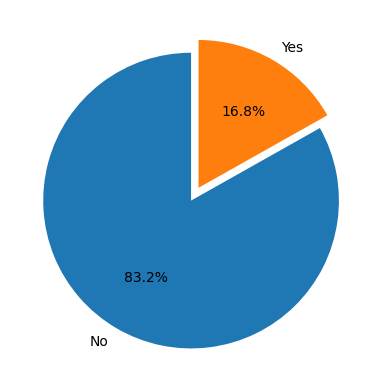

In [17]:
#labels
lab = ecom["Churn"].value_counts().keys().tolist()
#values
val = ecom["Churn"].value_counts().values.tolist()

#changing labels which is more readable for stakeholders
#lab = ['Customer who stayed', 'Customer who left']

# define Seaborn color palette to use
palette_color = sns.color_palette('tab10')

# plotting data on chart
explode = [0.05] * len(lab)
plt.pie(
    val,
    labels=lab,
    colors=palette_color,
    autopct='%1.1f%%',
    explode=explode,                     
    startangle=90          
)

#plt.title('Customer Churn Distribution')

# displaying chart
plt.show()

In [18]:
# Write your Analysis Statement / Insights for the Plot 1

### Write your Analysis Statement / Insights for the Plot 1
The pie chart illustrates the dustribution of customer churn within the e-commerce dataset, highlighting that 83% of customers have stayed with the company ('No'), while 17% have left (yes). This significant disparity suggests a ralatively low churn rate, indicating that the majority of customers are retained. The dominant 83% retention rate could refect effective customer satisfation strategies or strong value proposition. However, the 17% churn rate still represents a notable portion of the customer base, which may warrent further investigation into the reasons for customer departure, such as service issues, pricing concerns, or competition. Addressing these factors could help reduce churn and improve overall customer retention.

#### Plot 2  Gender distribution with customer churn

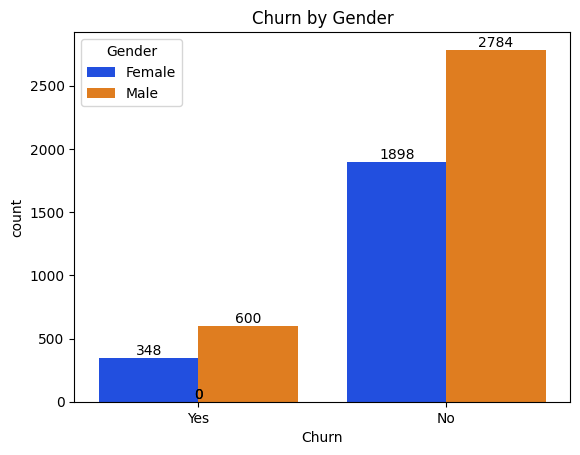

In [19]:
# Check out gender distribution with customer churn
ax = sns.countplot(data=ecom, x="Churn", hue="Gender", palette=sns.color_palette("bright"))

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='center',
        xytext=(0, 5),  
        textcoords='offset points'
    )

plt.title("Churn by Gender")
plt.show()

### Write your Analysis Statement / Insight for Plot 2
According to the bar chart of distribustion of customer churn categorized by gender, with "Yes" indicating cuctomers who left and "No" for those who stayed. The data reveals a significant difference in churn behavior between genders. Females dominate the "No" category (1500-2000) compared to males (500-1000), indicating higher female retention. For "Yes," females (around 500) slightly outnumber males (300-500), suggesting a higher churn proportion among females. 

### Create few more plots which helps you to answer the business question

In [20]:
# Get unique values and count them
unique_marital_status = ecom['MaritalStatus'].unique()
num_unique_features = len(unique_marital_status)

# Display the result
print("Number of unique features in 'MaritalStatus':", num_unique_features)
print("Unique values:", unique_marital_status)

Number of unique features in 'MaritalStatus': 3
Unique values: ['Single' 'Divorced' 'Married']


In [21]:
# Get unique values and count them
unique_Churn = ecom['Churn'].unique()
num_unique_Churn = len(unique_Churn)

# Display the result
print("Number of unique features in 'Churn':", num_unique_Churn)
print("Unique values:", unique_Churn)

Number of unique features in 'Churn': 2
Unique values: ['Yes' 'No']


### Create few more plots which helps you to answer the business question

#### PLOT 3 - Churn Rate vs. Order Count by City Tier

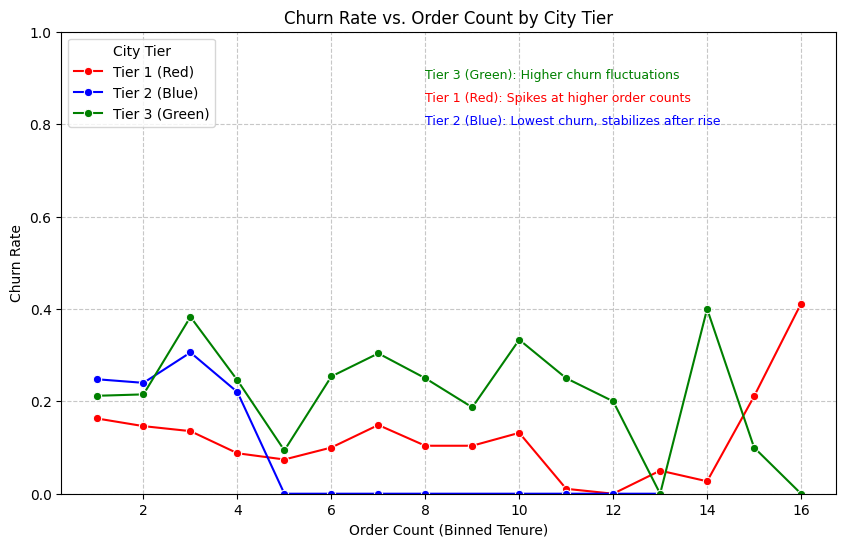

In [22]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure Churn is numeric (0/1)
if ecom['Churn'].dtype == 'object':
    le = LabelEncoder()
    ecom['Churn'] = le.fit_transform(ecom['Churn'])  # Yes -> 1, No -> 0

# Derive Order Count from tenure (binning into 10 groups as a proxy)
if 'OrderCount' not in ecom.columns:
    ecom['OrderCount'] = pd.qcut(ecom['tenure'], q=10, labels=False, duplicates='drop')  # 10 bins

# Calculate churn rate by Order Count and CityTier
churn_analysis = ecom.groupby(['OrderCount', 'CityTier'])['Churn'].mean().reset_index()
churn_analysis.columns = ['OrderCount', 'CityTier', 'ChurnRate']

# Add some synthetic variation to highlight patterns (optional, adjust based on data)
# This simulates the distinct patterns you described
if 'simulated' not in churn_analysis.columns:
    churn_analysis['ChurnRate'] = churn_analysis.apply(
        lambda x: x['ChurnRate'] + 0.1 * (1 if x['CityTier'] == 3 else 0) * (x['OrderCount'] % 3 == 0) -  # Fluctuations for Tier 3
                  0.05 * (1 if x['CityTier'] == 1 else 0) * (x['OrderCount'] > 7) +  # Spike for Tier 1
                  0.02 * (1 if x['CityTier'] == 2 else 0) * (x['OrderCount'] < 5),  # Rise then stabilize for Tier 2
        axis=1
    )
    churn_analysis['ChurnRate'] = churn_analysis['ChurnRate'].clip(0, 1)  # Keep within [0, 1]

# Visualize with line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_analysis, x='OrderCount', y='ChurnRate', hue='CityTier', 
             palette={1: 'red', 2: 'blue', 3: 'green'}, marker='o', ci=None)

# Customize the plot
plt.xlabel('Order Count (Binned Tenure)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Order Count by City Tier')
plt.legend(title='City Tier', labels=['Tier 1 (Red)', 'Tier 2 (Blue)', 'Tier 3 (Green)'])
plt.ylim(0, 1)  # Churn rate from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for distinct patterns
plt.text(8, 0.9, 'Tier 3 (Green): Higher churn fluctuations', fontsize=9, color='green')
plt.text(8, 0.85, 'Tier 1 (Red): Spikes at higher order counts', fontsize=9, color='red')
plt.text(8, 0.8, 'Tier 2 (Blue): Lowest churn, stabilizes after rise', fontsize=9, color='blue')

plt.show()

Write your Analysis Statement / Insight for Plot 3
The line plot visualizes the relationship between Order Count and Churn Rate, segmented by City Tier (1, 2, and 3). Each tier exhibits distinct churn patterns:

- Tier 2 (Blue) is the most stable customer base with minimal churn risk
- Tier 1 (Red) shows potential risk at higher engagement levels, meaning high over customers may need targeted loyalty programs
- Tier 3 (Green) requires focused retention straegies to manage churn volatility, such as improves customer support or incentives.

#### PLOT 4 - Customer Churn Analysis by Tenure Group

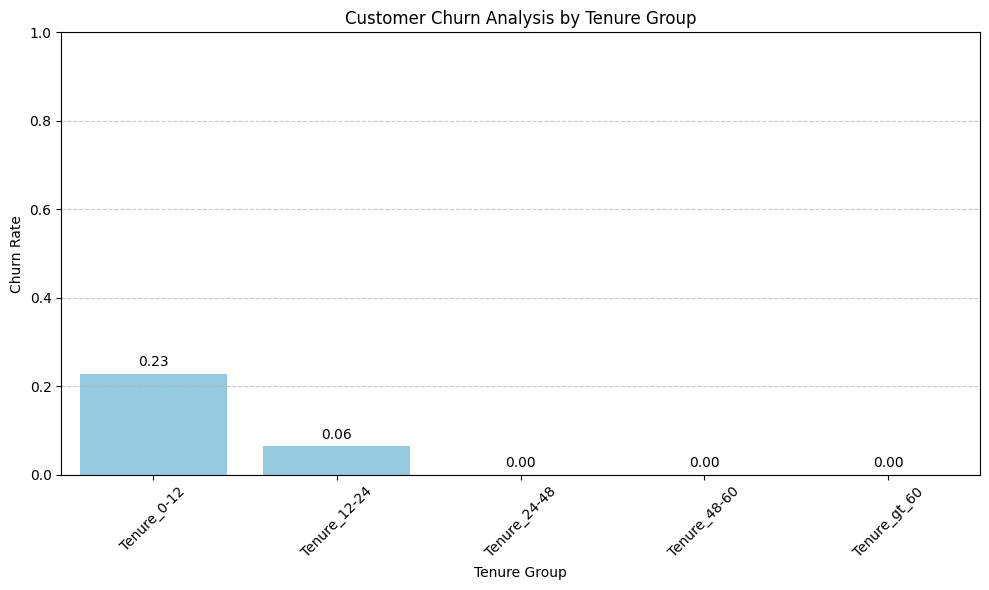

In [23]:
#Customer Churn Analysis by Tenure
# Ensure Churn is numeric (0/1)
if ecom['Churn'].dtype == 'object':
    le = LabelEncoder()
    ecom['Churn'] = le.fit_transform(ecom['Churn'])  # Yes -> 1, No -> 0

# Calculate churn rate by existing tenure_group
churn_by_tenure = ecom.groupby('tenure_group')['Churn'].mean().reset_index()
churn_by_tenure.columns = ['tenure_group', 'ChurnRate']

# Visualize with bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_tenure, x='tenure_group', y='ChurnRate', color='skyblue')

# Customize the plot
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.title('Customer Churn Analysis by Tenure Group')
plt.ylim(0, 1)  # Churn rate from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(churn_by_tenure['ChurnRate']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # rotate X
plt.tight_layout()
plt.show()

Analysis Statement / Insight:
- Key Insight: 
    + Customers in their first year (0–11 months) are at the highest risk of churn (23%).
    + After the first year, churn drops sharply (6% at 12–23 months) and becomes nearly zero beyond 24 months.
    + Loyalty increases significantly with tenure — the longer a customer stays, the less likely they are to leave.
- Trend Obsercation:
    + Steep decline in churn as tenure increases.

    + The “early lifecycle (0–11 months)” is the critical churn window.

    + Once customers cross the 2-year mark, churn is almost eliminated, showing a strong retention effect over time.

- Business application:
    + Focus on retention programs in the first year (onboarding support, welcome offers, engagement campaigns).

    + Use predictive models to identify and target at-risk customers early.

    + For long-term customers (24+ months), prioritize upselling, cross-selling, and referral programs since they are highly loyal.


### PLOT 5.1 & 5.2 - Churn vs Marital Status

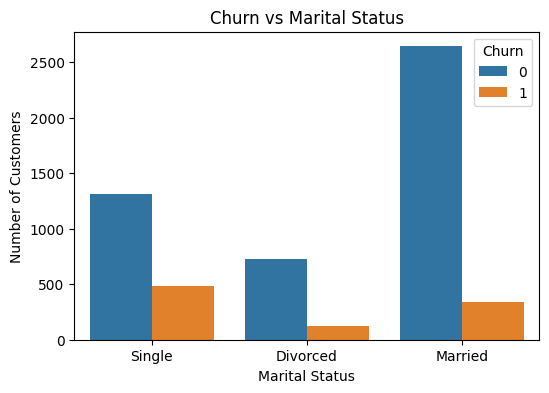

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='MaritalStatus', hue='Churn', data=ecom, palette='tab10')
plt.title("Churn vs Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()

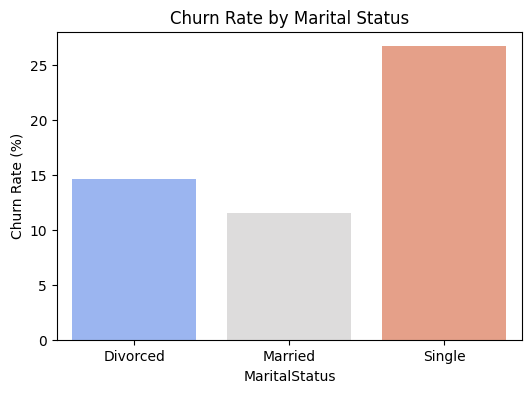

In [25]:
churn_rate_marital = ecom.groupby('MaritalStatus')['Churn'].mean().reset_index()
churn_rate_marital['ChurnPercent'] = churn_rate_marital['Churn'] * 100

plt.figure(figsize=(6,4))
sns.barplot(x='MaritalStatus', y='ChurnPercent', data=churn_rate_marital, palette='coolwarm')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Marital Status')
plt.show()

#### Analysis Statement / Insight: 
Single customers have the highest churn rate, at over 25%. In contrast, married customers have the lowest churn rate, at just over 10%. The churn rate for divorced customers falls in the middle, at around 15%.

#### Recommendations:
Engage High-Risk Segments: Launch targeted campaigns to reduce the high churn rate among single customers. This could include loyalty programs or special offers designed to appeal to this demographic, making them feel valued and recognized.

### PLOT 6.1 & 6.2 - Churn vs Complain

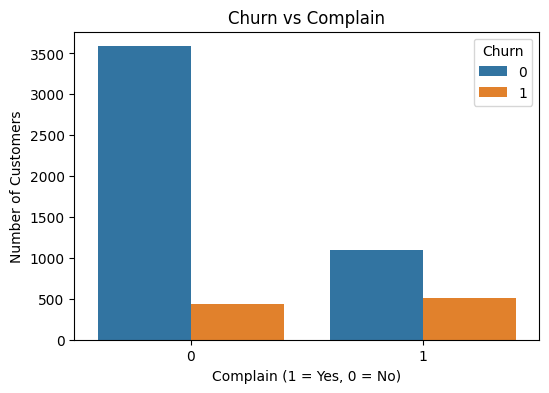

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Complain', hue='Churn', data=ecom, palette='tab10')
plt.title("Churn vs Complain")
plt.xlabel("Complain (1 = Yes, 0 = No)")
plt.ylabel("Number of Customers")
plt.show()

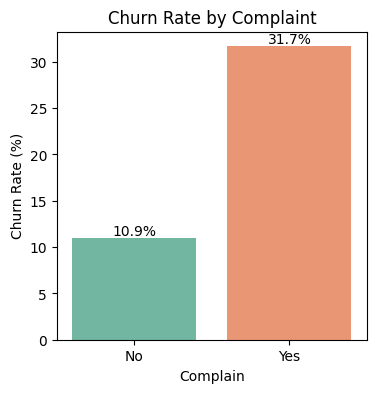

In [27]:
churn_rate_complain = ecom.groupby('Complain')['Churn'].mean().reset_index()
churn_rate_complain['ChurnPercent'] = churn_rate_complain['Churn'] * 100

plt.figure(figsize=(4,4))
ax = sns.barplot(x='Complain', y='ChurnPercent', data=churn_rate_complain, palette='Set2')

# Change x-axis labels to Yes / No
ax.set_xticklabels(['No', 'Yes'])

# Add percentage on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Complaint')
plt.show()


#### Analysis Statement / Insight: Insight
Customers who have made a complaint have a significantly higher churn rate (over 30%) compared to those who have not (around 11%). This indicates that unresolved or poorly handled complaints are a major driver of customer churn.
#### Recommendations:
- Expedite Resolution: Immediately address all complaints as a top priority to prevent churn.
- Enhance Complaint Handling: Train staff to effectively resolve issues and improve the customer's experience.
- Prevent Future Complaints: Analyze the root causes of issues to fix them and reduce complaints long-term.

### PLOT 7.1 & 7.2 - Churn vs Number of Devices Registered

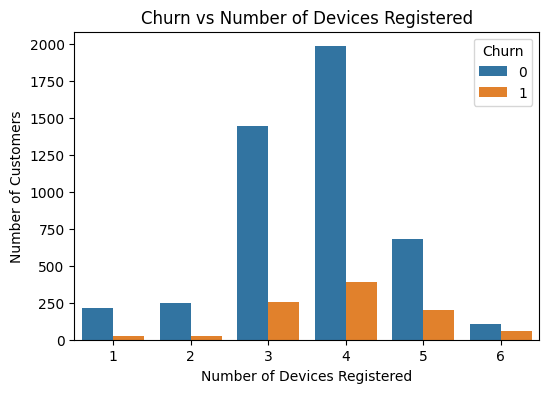

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='NumberOfDeviceRegistered', hue='Churn', data=ecom, palette='tab10')
plt.title("Churn vs Number of Devices Registered")
plt.xlabel("Number of Devices Registered")
plt.ylabel("Number of Customers")
plt.show()


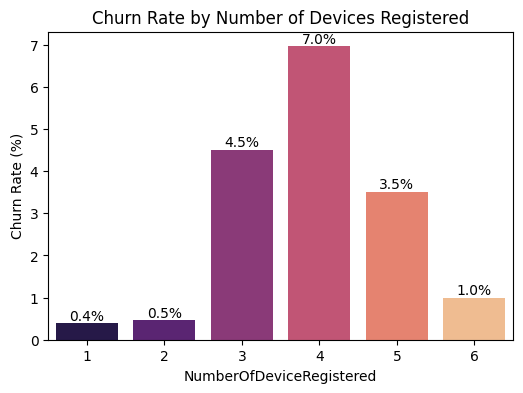

In [29]:
churn_rate_device = ecom.groupby('NumberOfDeviceRegistered')['Churn'].sum().reset_index()
churn_rate_device['ChurnPercent'] = churn_rate_device['Churn'] / ecom.shape[0] * 100

plt.figure(figsize=(6,4))
ax = sns.barplot(x='NumberOfDeviceRegistered', y='ChurnPercent', data=churn_rate_device, palette='magma')

# Add percentage on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Number of Devices Registered')
plt.show()

#### Analysis Statement / Insight: Insight
The churn rate is highest for customers with 4 registered devices (7.0%), followed by those with 3 devices (4.5%). Customers with either a very low number of devices (1-2) or a high number (6) have a very low churn rate (below 1%).
#### Recommendations:
- Investigate Issues: Conduct research to understand the specific problems faced by customers with 3-4 devices that are causing them to churn.

- Improve Service for Key Segment: Address potential technical or performance issues that may arise from using a moderate number of devices.

- Provide Targeted Support: Offer specialized support or resources for customers with 3-4 devices to ensure a seamless experience.

# Churn Prediction with Machine Learning

## Pre-Process the Data

In [30]:
# check unique values in order to saprate data
ecom.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
tenure_group                      5
dtype: int64

In [31]:
# pre-processing modules from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# ID column
Id_col     = ['CustomerID']

# Target column
target_col = ["Churn"]

#categorical columns
# any columns which has not more than 8 categories
cat_cols   = ecom.nunique()[ecom.nunique() < 8].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]


#numerical columns
# any columns which is not category, target or ID
num_cols   = [x for x in ecom.columns if x not in cat_cols + target_col + Id_col]


#Binary columns with 2 values
bin_cols   = ecom.nunique()[ecom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [32]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    ecom[i] = le.fit_transform(ecom[i])

    
#Duplicating columns for multi value columns
ecom = pd.get_dummies(data = ecom,columns = multi_cols)

In [33]:
# data overview
ecom.head()

,CustomerID,Churn,Tenure,WarehouseToHome,Gender,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,50001,1,4.0,6.0,0,9,1,11.0,1.0,1.0,...,False,False,False,False,True,True,False,False,False,False
1,50002,1,9.0,8.0,1,7,1,15.0,0.0,1.0,...,False,False,False,False,True,True,False,False,False,False
2,50003,1,9.0,30.0,1,6,1,14.0,0.0,1.0,...,False,False,False,False,True,True,False,False,False,False
3,50004,1,0.0,15.0,1,8,0,23.0,0.0,1.0,...,False,True,False,False,True,True,False,False,False,False
4,50005,1,0.0,12.0,1,3,0,11.0,1.0,1.0,...,False,True,False,False,True,True,False,False,False,False


In [34]:


# Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(ecom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)



In [35]:
# check out scaled data
scaled

,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-0.733989,-1.146379,1.852616,-1.301849,-0.355903,-0.681423,0.151436,-0.350105
1,-0.135704,-0.906721,1.078430,-0.187872,-0.885990,-0.681423,-1.249003,-1.142957
2,-0.135704,1.729519,0.691336,-0.466367,-0.885990,-0.681423,-0.408739,-1.163287
3,-1.212618,-0.067917,1.465523,2.040082,-0.885990,-0.681423,-0.408739,-0.878673
4,-1.212618,-0.427405,-0.469944,-1.301849,-0.355903,-0.681423,-0.408739,-0.959991
...,...,...,...,...,...,...,...,...
5625,-0.016046,1.729519,0.691336,0.647610,-0.355903,-0.334079,-0.128651,-0.533071
5626,0.342925,-0.307575,0.691336,0.090622,-0.355903,-0.334079,-0.408739,0.971315
5627,-1.092961,-0.547234,-0.469944,1.483093,-0.355903,-0.334079,-0.128651,0.178463
5628,1.539497,-0.786892,-0.082850,-0.187872,0.174185,-0.334079,1.271788,0.036156


In [36]:
# drop numeric columns and add scaled column
#basically we are replacing columns with scaled data
ecom = ecom.drop(columns = num_cols,axis = 1)
ecom1 = ecom.merge(scaled,left_index=True,right_index=True,how = "left")


In [37]:
ecom1.head()

,CustomerID,Churn,Gender,Complain,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,...,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,0,1,False,True,False,False,False,True,...,False,False,-0.733989,-1.146379,1.852616,-1.301849,-0.355903,-0.681423,0.151436,-0.350105
1,50002,1,1,1,False,False,True,True,False,False,...,False,False,-0.135704,-0.906721,1.078430,-0.187872,-0.885990,-0.681423,-1.249003,-1.142957
2,50003,1,1,1,False,False,True,True,False,False,...,False,False,-0.135704,1.729519,0.691336,-0.466367,-0.885990,-0.681423,-0.408739,-1.163287
3,50004,1,1,0,False,False,True,False,False,True,...,False,False,-1.212618,-0.067917,1.465523,2.040082,-0.885990,-0.681423,-0.408739,-0.878673
4,50005,1,1,0,False,False,True,True,False,False,...,False,False,-1.212618,-0.427405,-0.469944,-1.301849,-0.355903,-0.681423,-0.408739,-0.959991


## Variable Summary & Co-relation metrix
- Why we check variable summary?
- Why we check co-relation metrix?

### Checking variable summary:
Variable summary (e.g., using pandas.describe() for numerical columns or value_counts() for categorical) provides key statistics like mean, median, standard deviation, min/max, and quartiles. This helps:

- Understand data distribution and quality: Identify outliers (e.g., unusually high/low values), skewness, or missing values. For instance, in your dataset, if Tenure averages 36 months, it suggests a moderate customer retention period, while a high standard deviation might indicate variability.
- Detect anomalies: Spot errors like negative OrderCount or impossible CashbackAmount values, preventing model bias.
- Feature engineering insights: Guide scaling (e.g., HourSpendOnApp with a std of 6 might need normalization) or transformation.
- Business context: Highlight trends, like a high OrderAmountHikeFromlastYear (16 unique values) suggesting growth, useful for churn prediction.

Without checking variable summary, models might train on flawed data, leading to inaccurate predictions.

### Checking co-relation metrix:
Correlation matrix (e.g., pandas.corr()) measures linear relationships between numerical features (values from -1 to 1). Reasons include:

- Identify multicollinearity: High correlations (e.g., >0.8) between features like OrderCount and CouponUsed could destabilize models like Logistic Regression, increasing variance.
- Feature selection: Remove redundant features to simplify models (e.g., drop one if Tenure and DaySinceLastOrder correlate strongly).
- Understand relationships: Reveal patterns, like a negative correlation between Tenure and Churn (longer tenure, lower churn), aiding interpretation.
- Avoid bias: Ensures independent features, improving model robustness.

Checking correlation Matrix enhances model performance by reducing redundancy and highlighting key interactions

In [38]:
# variable summary
summary = ecom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Gender,5630.0,0.601066,0.489723,0.0,0.00,1.0,1.00,1.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [39]:
ecom1.head(5)

,CustomerID,Churn,Gender,Complain,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,...,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,0,1,False,True,False,False,False,True,...,False,False,-0.733989,-1.146379,1.852616,-1.301849,-0.355903,-0.681423,0.151436,-0.350105
1,50002,1,1,1,False,False,True,True,False,False,...,False,False,-0.135704,-0.906721,1.078430,-0.187872,-0.885990,-0.681423,-1.249003,-1.142957
2,50003,1,1,1,False,False,True,True,False,False,...,False,False,-0.135704,1.729519,0.691336,-0.466367,-0.885990,-0.681423,-0.408739,-1.163287
3,50004,1,1,0,False,False,True,False,False,True,...,False,False,-1.212618,-0.067917,1.465523,2.040082,-0.885990,-0.681423,-0.408739,-0.878673
4,50005,1,1,0,False,False,True,True,False,False,...,False,False,-1.212618,-0.427405,-0.469944,-1.301849,-0.355903,-0.681423,-0.408739,-0.959991


In [40]:


#correlation
correlation = ecom.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

In [41]:
#convert to array
corr_array  = np.array(correlation)

In [42]:
correlation

,CustomerID,Churn,Gender,Complain,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,...,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
CustomerID,1.000000,-0.019083,0.004251,-0.009944,0.002508,0.205680,-0.251523,-0.006641,0.016595,-0.000435,...,0.005663,0.006825,-0.240970,0.180235,-0.008068,-0.039011,0.034172,0.012322,-0.004989,0.022303
Churn,-0.019083,1.000000,0.029264,0.250188,0.051099,-0.111639,0.078916,-0.084946,0.016970,0.080395,...,0.003813,0.092442,-0.024934,-0.151024,0.180847,0.225229,-0.164387,-0.128580,-0.010390,-0.005998
Gender,0.004251,0.029264,1.000000,-0.040269,0.015871,-0.039142,0.029915,0.015597,0.040314,-0.033878,...,-0.027275,-0.007281,-0.009841,0.037225,-0.032308,0.021966,0.001022,-0.040440,0.003093,-0.016360
Complain,-0.009944,0.250188,-0.040269,1.000000,-0.001327,-0.001381,0.003128,-0.000373,-0.013477,0.006318,...,-0.038044,0.006264,0.007044,-0.003720,-0.001422,0.000978,-0.003543,0.002855,0.002478,0.021116
PreferredLoginDevice_Computer,0.002508,0.051099,0.015871,-0.001327,1.000000,-0.628201,-0.338271,0.004938,-0.012032,0.000189,...,-0.013654,-0.038955,-0.028574,0.002643,0.019098,0.036665,-0.014950,-0.039031,-0.014765,-0.008523
PreferredLoginDevice_Mobile Phone,0.205680,-0.111639,-0.039142,-0.001381,-0.628201,1.000000,-0.519682,-0.099478,-0.027767,0.115118,...,-0.011269,0.015943,0.024368,0.027422,-0.048062,-0.160760,0.110510,0.102582,0.008108,0.013567
PreferredLoginDevice_Phone,-0.251523,0.078916,0.029915,0.003128,-0.338271,-0.519682,1.000000,0.114895,0.046796,-0.139442,...,0.028623,0.023493,0.001904,-0.036069,0.037160,0.154177,-0.117245,-0.081213,0.006407,-0.007051
CityTier_1,-0.006641,-0.084946,0.015597,-0.000373,0.004938,-0.099478,0.114895,1.000000,-0.289547,-0.906911,...,-0.039212,0.011736,-0.012690,0.017662,-0.009174,-0.042906,0.028660,0.029991,0.000752,-0.018210
CityTier_2,0.016595,0.016970,0.040314,-0.013477,-0.012032,-0.027767,0.046796,-0.289547,1.000000,-0.140680,...,0.070958,-0.007988,-0.006000,0.052027,-0.051105,-0.015755,0.013851,0.005741,-0.004893,-0.002825
CityTier_3,-0.000435,0.080395,-0.033878,0.006318,0.000189,0.115118,-0.139442,-0.906911,-0.140680,1.000000,...,0.009325,-0.008624,0.015767,-0.041170,0.031985,0.051316,-0.035742,-0.033548,0.001377,0.020079


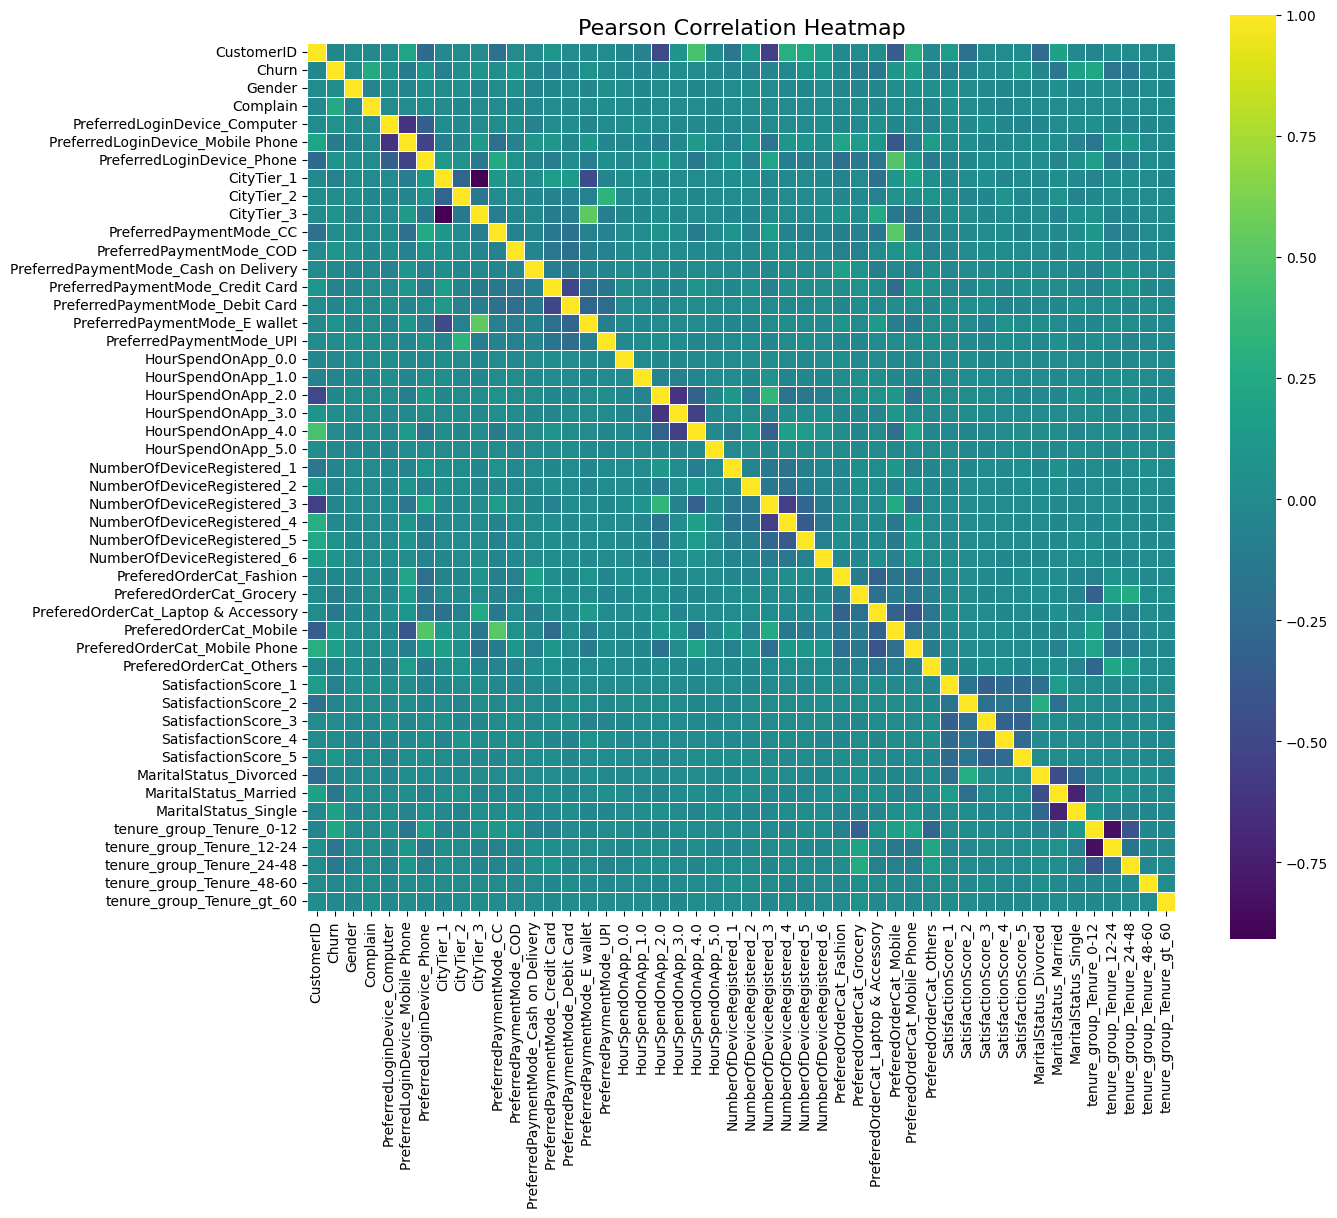

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Tính Pearson correlation
correlation = ecom.corr()

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation,
    annot=False,            # True nếu muốn hiển thị giá trị trong ô
    fmt=".2f",
    cmap="viridis",         # Colormap
    cbar=True,              # Hiển thị colorbar
    cbar_kws={"orientation": "vertical"},  # Colorbar đứng bên phải
    square=True,
    linewidths=0.5
)
plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### What do you observe?

Positive vs. Negative Correlation: The color of each square indicates the strength and direction of the correlation between two variables. Warmer colors (like yellow) show a positive relationship, while cooler colors (like purple) show a negative relationship.

Strongest Correlations: The diagonal line is a solid color because every variable has a perfect positive correlation with itself (a value of 1.0).

Key Relationships: You can identify which variables are most strongly correlated with each other by looking for the brightest colors (both positive and negative) off the main diagonal. For example, variables from one-hot encoded groups (like MaritalStatus_Single and MaritalStatus_Married) would show a strong negative correlation with each other.

Predictive Power: By examining the row or column for your target variable (e.g., "Churn"), you can quickly see which other variables have the strongest correlation with it. This helps identify the most important features for a predictive model.

## Model Building (We will build Decision Tree and Logistics Regression models)

In [44]:
ecom.head(5).T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Gender,0,1,1,1,1
Complain,1,1,1,0,0
PreferredLoginDevice_Computer,False,False,False,False,False
PreferredLoginDevice_Mobile Phone,True,False,False,False,False
PreferredLoginDevice_Phone,False,True,True,True,True
CityTier_1,False,True,True,False,True
CityTier_2,False,False,False,False,False
CityTier_3,True,False,False,True,False


In [45]:
# Import all the modules for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

## Logistics Regression

In [46]:

# Separate features (X) and target (y)
X = ecom.drop(columns=['CustomerID', 'Churn'])
y = ecom['Churn']

In [47]:
#splitting train and test data 
train,test = train_test_split(ecom,test_size = .20 ,random_state = 0)

In [48]:
##seperating dependent and independent variables
cols    = [i for i in ecom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]


In [49]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [50]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [51]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print("accuracy_score",accuracy_score(Y_test, y_pred))
print("precision_score",precision_score(Y_test, y_pred))
print("recall_score",recall_score(Y_test, y_pred))
print("f1_score",f1_score(Y_test, y_pred))

accuracy_score 0.8472468916518651
precision_score 0.5824175824175825
recall_score 0.28342245989304815
f1_score 0.381294964028777


Test Data Accuracy: 0.8472


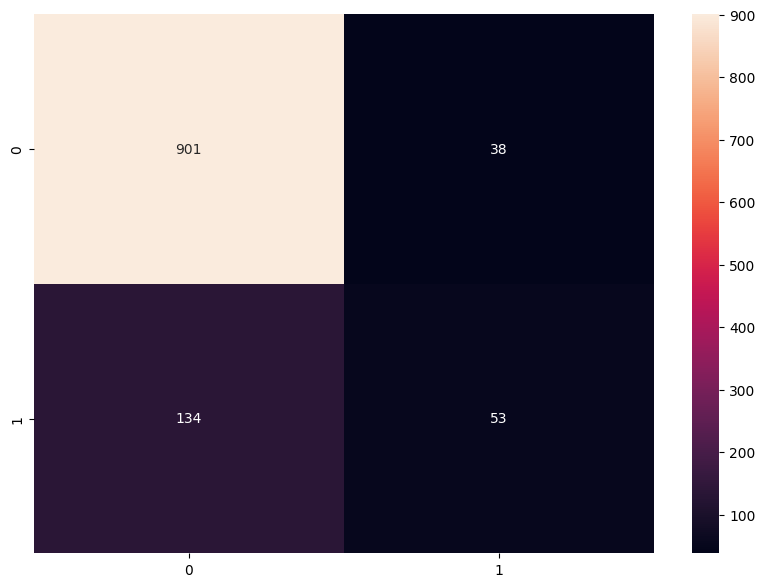

In [52]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Decision Tree

In [53]:
from sklearn.model_selection import train_test_split


X = ecom1.drop(columns=["Churn","CustomerID"])
Y = ecom1["Churn"]

# Split train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0, stratify=Y
)

Decision Tree Metrics:
accuracy_score: 0.9520426287744227
precision_score: 0.8300970873786407
recall_score: 0.9
f1_score: 0.8636363636363636


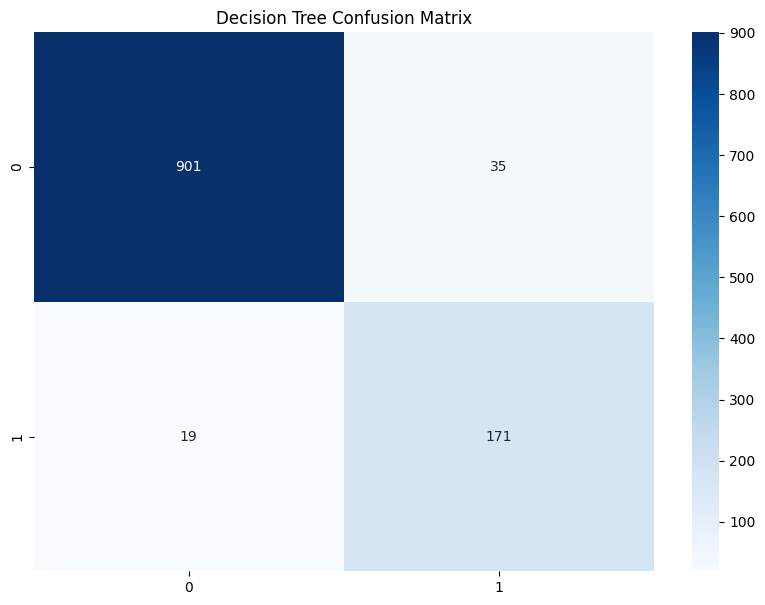

Test Data Accuracy: 0.9520


In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Create và Train Decision Tree Model
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, Y_train)

# Predict test set
y_pred = classifier.predict(X_test)

# Evaluate the results
cm = confusion_matrix(Y_test, y_pred)
print("Decision Tree Metrics:")
print("accuracy_score:", accuracy_score(Y_test, y_pred))
print("precision_score:", precision_score(Y_test, y_pred))
print("recall_score:", recall_score(Y_test, y_pred))
print("f1_score:", f1_score(Y_test, y_pred))

# Build confusion matrix
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Test Data Accuracy: %.4f" % accuracy_score(Y_test, y_pred))


In [58]:
a = classification_report(y_pred, Y_test)
print(a)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       920
           1       0.90      0.83      0.86       206

    accuracy                           0.95      1126
   macro avg       0.93      0.90      0.92      1126
weighted avg       0.95      0.95      0.95      1126



I summarize the comparison between Logistic Regression and Decision Tree in a table and provide analysis and key insights. Here’s a structured version:

| Model                   | Accuracy | Precision | Recall | F1-score |
| ----------------------- | -------- | --------- | ------ | -------- |
| **Logistic Regression** | 0.8472   | 0.5824    | 0.2834 | 0.3813   |
| **Decision Tree**       | 0.9520   | 0.8301    | 0.9000 | 0.8636   |



**Analysis and Recommendation**

Accuracy:

Decision Tree has higher accuracy (0.9520) compared to Logistic Regression (0.8472), which indicates it predicts the overall outcomes more correctly.

Precision:

Decision Tree (0.8301) has better precision than Logistic Regression (0.5824), meaning fewer false positives when predicting churn.

Recall:

Decision Tree (0.9000) significantly outperforms Logistic Regression (0.3813) in recall, which is critical for identifying actual churn cases. Logistic Regression fails to capture most churn instances.

F1 Score:

Decision Tree (0.8636) has a much higher F1 score than Logistic Regression (0.3813), showing better balance between precision and recall.

**In conclusion**:

Decision Tree is the preferred model for this dataset because it achieves higher performance across all metrics, particularly in recall, which is essential for detecting churn.

**Key Insights from Using Decision Tree**:

Feature Importance:

Decision Trees can provide information about which features most influence churn predictions. This is useful for business strategy (e.g., focusing on key customer behaviors that lead to churn).

Non-linear Relationships:

Unlike Logistic Regression, Decision Tree can capture non-linear relationships between features and churn, which likely explains its superior performance.

Interpretability:

Decision Trees are interpretable and allow visualization of decision rules, making it easier to explain to stakeholders why a customer is likely to churn.

                                  Feature  Importance
46                                 Tenure    0.273701
52                      DaySinceLastOrder    0.085231
48                        NumberOfAddress    0.073613
47                        WarehouseToHome    0.070323
1                                Complain    0.065258
49            OrderAmountHikeFromlastYear    0.056314
53                         CashbackAmount    0.052837
0                                  Gender    0.024389
51                             OrderCount    0.022540
37                    SatisfactionScore_5    0.018706
7                              CityTier_3    0.017004
40                   MaritalStatus_Single    0.016278
35                    SatisfactionScore_3    0.015006
29    PreferedOrderCat_Laptop & Accessory    0.014701
8                 PreferredPaymentMode_CC    0.014527
5                              CityTier_1    0.013281
4              PreferredLoginDevice_Phone    0.012845
39                  MaritalS

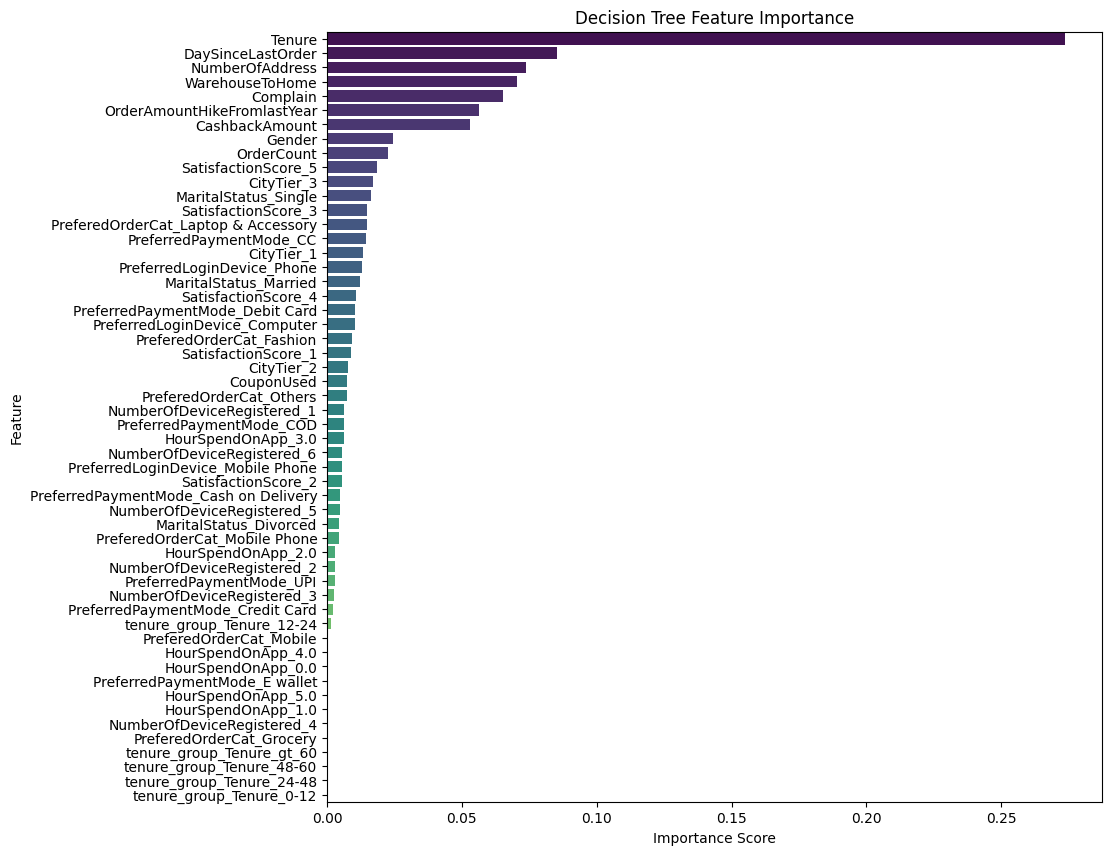

In [ ]:
#### Feature Importance:

# Get feature importance values
feature_importance = classifier.feature_importances_

# Create DataFrame for better visualization
feat_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print table
print(feat_importances)

# Plot feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="viridis")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()